# API Profile

In [1]:
import base64
import requests, json
import pandas as pd

from itsdangerous import URLSafeTimedSerializer
from IPython.display import display

In [2]:
TM_SECRET = '0cNOkuyerq9J6vEXics6nTwPnjBgFeGF1Pq6yVy9'
TM_APP_BASE_URL = 'http://127.0.0.1:5000'

In [3]:
def create_token(user_id):
    serializer = URLSafeTimedSerializer(TM_SECRET)
    token = serializer.dumps(user_id)
    encoded = base64.b64encode(bytes(token, 'utf-8')).decode('utf-8')

    return encoded

In [4]:
OSM_User_ID_number = 834883 
TOKEN = create_token(OSM_User_ID_number)

In [5]:
payloads_examples = {
    "organisations": [2],
    "campaign_id": 5,
    "license_id": 13,
    "project_id": 6,
    "task_id": 8,
    "interest_id": 3,
    "organisation_id": 2,
    "message_id": 3,
    "category_id": 3,
    "team_id": 5,
    "username": "nahomy",
    "user_id": OSM_User_ID_number,
}

payload_post_patch_examples = {
    "/api/v2/interests/": {"name": "covid"},
    "/api/v2/interests/{interest_id}/": {"name": "Public Domain 2"},
    "/api/v2/projects/{project_id}/actions/set-interests/": {"interests": [3]},
    "/api/v2/licenses/": {
        "description": "licencia 2",
        "name": "licencia 2",
        "plainText": "licencia 2",
    },
    "/api/v2/organisations/": {
        "logo": "string",
        "managers": ["nahomy"],
        "name": "test",
        "url": "string",
    },
    "/api/v2/organisations/{organisation_id}/": {
        "logo": "string",
        "managers": ["nahomy"],
        "name": "test",
        "url": "string",
    },
    "/api/v2/projects/": {
        "cloneFromProjectId": 6,
        "projectName": "Mapathon Bahia Blanca",
        "areaOfInterest": {
            "type": "FeatureCollection",
            "features": [
                {
                    "id": "65d4fe238d4356225e599c1b72e070d0",
                    "type": "Feature",
                    "properties": {},
                    "geometry": {
                        "coordinates": [
                            [
                                [-62.363229765845944, -38.70359480488574],
                                [-62.28349668643837, -38.61738800371326],
                                [-62.14505903208223, -38.716585238332854],
                                [-62.25283011743514, -38.78764893912241],
                                [-62.363229765845944, -38.70359480488574],
                            ]
                        ],
                        "type": "Polygon",
                    },
                }
            ],
        },
        "tasks": {
            "type": "FeatureCollection",
            "features": [
                {
                    "type": "Feature",
                    "properties": {"x": 167, "y": 196, "zoom": 9, "isSquare": True},
                    "geometry": {
                        "type": "MultiPolygon",
                        "coordinates": [
                            [
                                [
                                    [-62.578124997501575, -38.82259097486486],
                                    [-61.87499999752964, -38.82259097486486],
                                    [-61.87499999752964, -38.272688534680675],
                                    [-62.578124997501575, -38.272688534680675],
                                    [-62.578124997501575, -38.82259097486486],
                                ]
                            ]
                        ],
                    },
                }
            ],
        },
        "arbitraryTasks": False,
    },
    "/api/v2/projects/{project_id}/": {
        "allowedUsernames": ["string"],
        "campaign": "string",
        "changesetComment": "string",
        "countryTag": ["string"],
        "defaultLocale": "string",
        "dueDate": "Unknown Type: date",
        "entitiesToMap": "string",
        "imagery": "string",
        "josmPreset": "string",
        "licenseId": 13,
        "mapperLevel": "string",
        "mappingEditors": ["string"],
        "mappingTypes": ["string"],
        "mapping_permission": "string",
        "organisation": 2,
        "priorityAreas": [],
        "private": False,
        "projectInfoLocales": [],
        "projectPriority": "string",
        "projectStatus": "string",
        "taskCreationMode": 0,
        "validationEditors": ["string"],
        "validation_permission": "string",
    },
    "/api/v2/projects/{project_id}/actions/transfer-ownership/": {"username": "nahomy"},
}


In [6]:
def get_parameters(payloads):
    for payload in payloads:
        if payload in payloads_examples:
            payloads[payload] = payloads_examples[payload]
    return payloads

In [7]:
def get_parameters_post_patch(key, payloads):
    if key in payload_post_patch_examples:
        for value, content in payload_post_patch_examples[key].items():
            payloads[value] = payload_post_patch_examples[key][value]
    return payloads

In [8]:
def set_parameters(endpoint, headers, paths, params, payloads):
        
        for method, values in endpoint.items():
            if "parameters" in endpoint[method]:
                for param in endpoint[method]["parameters"]:
                    if param["in"] == "header":
                        
                        if param["name"] == "Authorization":
                            headers.update({param["name"]: f"Token {TOKEN}"})
                        else:
                            if "default" in param:
                                headers.update({param["name"]: param["default"]})

                    elif param["in"] == "path":
                        if "default" in param:
                            paths.update({param["name"]: param["default"]})

                    elif param["in"] == "query":
                        if "default" in param:
                            params.update({param["name"]: param["default"]})
                            
                    elif param["in"] == "body":
                        if "properties" in param["schema"]:
                            properties = param["schema"]["properties"]
                            for item, propertie in properties.items():
                                if "default" in propertie:
                                    payloads.update({item: propertie["default"]})
                                elif "example" in propertie:
                                    payloads.update({item: propertie["example"]})

In [14]:
def add_data_response(endpoint, method, url, resp):
    data["Model"].append(endpoint[method]["tags"][0])
    data["Method"].append(method)
    data["API url"].append(url)
    data["Time"].append(resp.elapsed.total_seconds())
    data["Status code"].append(resp.status_code)

In [24]:
def calculate_time_response(endpoints, data_time_response):
    headers = {}
    paths = {}
    params = {}
    url = ""

    for key, endpoint in endpoints.items():

        payloads = {}
        
        set_parameters(endpoint, headers, paths, params, payloads)

        if paths:
            url = key.format(**get_parameters(paths))
        if "get" in endpoint:
            resp = requests.get(TM_APP_BASE_URL + url, headers=headers, params=params)
            add_data_response(endpoint,"get", url, resp)

        if "post" in endpoint:
            resp = requests.post(
                TM_APP_BASE_URL + url,
                headers=headers,
                params=params,
                json=get_parameters_post_patch(key, payloads),
            )
            add_data_response(endpoint,"post", url, resp)

        if "patch" in endpoint:
            resp = requests.patch(
                TM_APP_BASE_URL + url,
                headers=headers,
                params=params,
                json=get_parameters_post_patch(key, payloads),
            )
            add_data_response(endpoint,"patch", url, resp)

        if "delete" in endpoint:
            resp = requests.delete(
                TM_APP_BASE_URL + url,
                headers=headers,
                params=params,
                json=get_parameters_post_patch(key, payloads),
            )
            add_data_response(endpoint,"delete", url, resp)

In [25]:
data = {
    "Model":[],
    "Method":[],
    "API url": [],
    "Time": [],
    "Status code": []
}

def main():
    
    endpoints = json.loads(
        requests.get("http://127.0.0.1:5000/api/v2/system/docs/json/").content
    )
    calculate_time_response(endpoints["paths"], data)
    

if __name__ == '__main__':
    main()

In [26]:
df = pd.DataFrame(data)

models = list(dict.fromkeys(df["Model"]))
grouped = df.groupby(df.Model)

for model in models:
    group = grouped.get_group(model)
    display(group)

,Model,Method,API url,Time,Status code
0,campaigns,get,,0.002589,200
1,campaigns,post,,0.003652,405
2,campaigns,get,/api/v2/campaigns/5/,0.010922,200
3,campaigns,patch,/api/v2/campaigns/5/,0.020857,400
4,campaigns,delete,/api/v2/campaigns/5/,0.028252,500
27,campaigns,get,/api/v2/organisations/2/campaigns/,0.008183,200
28,campaigns,post,/api/v2/organisations/2/campaigns/5/,0.008552,400
29,campaigns,delete,/api/v2/organisations/2/campaigns/5/,0.045993,200
51,campaigns,get,/api/v2/projects/6/campaigns/,0.005143,200
52,campaigns,post,/api/v2/projects/6/campaigns/5/,0.023164,200


,Model,Method,API url,Time,Status code
5,countries,get,/api/v2/countries/,0.004357,200


,Model,Method,API url,Time,Status code
6,interests,get,/api/v2/interests/,0.007497,200
7,interests,post,/api/v2/interests/,0.016427,400
8,interests,get,/api/v2/interests/3/,0.018312,500
9,interests,patch,/api/v2/interests/3/,0.016585,500
10,interests,delete,/api/v2/interests/3/,0.016551,404
43,interests,post,/api/v2/projects/6/actions/set-interests/,0.042722,404
121,interests,post,/api/v2/users/me/actions/set-interests/,0.003013,500
130,interests,get,/api/v2/users/834883/statistics/interests/,0.005265,200
136,interests,get,/api/v2/users/nahomy/queries/interests/,0.012659,200


,Model,Method,API url,Time,Status code
11,licenses,get,/api/v2/licenses/,0.004390,200
12,licenses,post,/api/v2/licenses/,0.005296,500
13,licenses,get,/api/v2/licenses/13/,0.004009,404
14,licenses,patch,/api/v2/licenses/13/,0.004741,404
15,licenses,delete,/api/v2/licenses/13/,0.004145,404
16,licenses,post,/api/v2/licenses/13/actions/accept-for-me/,0.010772,500


,Model,Method,API url,Time,Status code
17,notifications,get,/api/v2/notifications/,0.043131,200
18,notifications,delete,/api/v2/notifications/delete-multiple/,0.002851,500
19,notifications,get,/api/v2/notifications/queries/own/count-unread/,0.002342,200
20,notifications,get,/api/v2/notifications/3/,0.005066,403
21,notifications,delete,/api/v2/notifications/3/,0.005282,403


,Model,Method,API url,Time,Status code
22,organisations,get,/api/v2/organisations/,0.012310,200
23,organisations,post,/api/v2/organisations/,0.013192,400
24,organisations,get,/api/v2/organisations/2/,0.015521,200
25,organisations,patch,/api/v2/organisations/2/,0.010467,402
26,organisations,delete,/api/v2/organisations/2/,0.010611,403


,Model,Method,API url,Time,Status code
30,projects,get,/api/v2/projects/,0.076709,200
31,projects,post,/api/v2/projects/,0.980591,201
32,projects,get,/api/v2/projects/queries/bbox/,0.031457,200
33,projects,get,/api/v2/projects/queries/featured/,0.008180,200
34,projects,get,/api/v2/projects/queries/myself/owner/,0.048257,500
35,projects,get,/api/v2/projects/queries/popular/,0.033286,200
36,projects,get,/api/v2/projects/queries/nahomy/touched/,0.016463,200
37,projects,get,/api/v2/projects/6/,0.024472,200
38,projects,patch,/api/v2/projects/6/,0.010814,400
39,projects,delete,/api/v2/projects/6/,0.030065,403


,Model,Method,API url,Time,Status code
47,annotations,get,/api/v2/projects/6/annotations/,0.006035,200
48,annotations,post,/api/v2/projects/6/annotations/,0.003372,500
49,annotations,get,/api/v2/projects/6/annotations/None/,0.006521,200
50,annotations,post,/api/v2/projects/6/annotations/None/,0.003567,500


,Model,Method,API url,Time,Status code
54,comments,get,/api/v2/projects/6/comments/,0.016152,200
55,comments,post,/api/v2/projects/6/comments/,0.040242,201
56,comments,get,/api/v2/projects/6/comments/tasks/8/,0.002167,400
57,comments,post,/api/v2/projects/6/comments/tasks/8/,0.004326,400


,Model,Method,API url,Time,Status code
60,favorites,get,/api/v2/projects/6/favorite/,0.009878,200
61,favorites,post,/api/v2/projects/6/favorite/,0.013113,200
62,favorites,delete,/api/v2/projects/6/favorite/,0.025230,200
124,favorites,get,/api/v2/users/queries/favorites/,0.025259,200


,Model,Method,API url,Time,Status code
70,tasks,get,/api/v2/projects/6/tasks/,0.008263,200
71,tasks,post,/api/v2/projects/6/tasks/actions/invalidate-all/,0.896628,200
72,tasks,post,/api/v2/projects/6/tasks/actions/lock-for-mapp...,0.500298,200
73,tasks,post,/api/v2/projects/6/tasks/actions/lock-for-vali...,0.006587,403
74,tasks,post,/api/v2/projects/6/tasks/actions/map-all/,1.061665,200
75,tasks,post,/api/v2/projects/6/tasks/actions/reset-all-bad...,0.012906,200
76,tasks,post,/api/v2/projects/6/tasks/actions/reset-all/,0.484484,200
77,tasks,post,/api/v2/projects/6/tasks/actions/split/8/,0.007996,403
78,tasks,post,/api/v2/projects/6/tasks/actions/stop-mapping/8/,0.007997,403
79,tasks,post,/api/v2/projects/6/tasks/actions/stop-validation/,0.004683,400


,Model,Method,API url,Time,Status code
89,teams,get,/api/v2/projects/6/teams/,0.003794,200
90,teams,post,/api/v2/projects/6/teams/5/,0.006889,500
91,teams,patch,/api/v2/projects/6/teams/5/,0.006813,500
92,teams,delete,/api/v2/projects/6/teams/5/,0.007866,500
111,teams,get,/api/v2/teams/,0.110818,200
112,teams,post,/api/v2/teams/,0.033989,201
113,teams,get,/api/v2/teams/5/,0.003960,404
114,teams,patch,/api/v2/teams/5/,0.005140,500
115,teams,delete,/api/v2/teams/5/,0.007189,404
116,teams,post,/api/v2/teams/5/actions/join/,0.003487,400


,Model,Method,API url,Time,Status code
93,system,get,/api/v2/system/authentication/applications/,0.018438,200
94,system,post,/api/v2/system/authentication/applications/,0.021969,200
95,system,patch,/api/v2/system/authentication/applications/1/,0.004869,500
96,system,delete,/api/v2/system/authentication/applications/1/,0.004043,404
97,system,get,/api/v2/system/authentication/callback/,0.002187,500
98,system,get,/api/v2/system/authentication/email/,0.007314,403
99,system,get,/api/v2/system/authentication/login/,0.942128,500
100,system,post,/api/v2/system/contact-admin/,0.009452,500
101,system,get,/api/v2/system/docs/json/,0.474756,200
102,system,get,/api/v2/system/heartbeat/,0.001713,200


,Model,Method,API url,Time,Status code
106,issues,get,/api/v2/tasks/issues/categories/,0.003957,200
107,issues,post,/api/v2/tasks/issues/categories/,0.003240,400
108,issues,get,/api/v2/tasks/issues/categories/3/,0.004425,500
109,issues,patch,/api/v2/tasks/issues/categories/3/,0.003148,400
110,issues,delete,/api/v2/tasks/issues/categories/3/,0.004696,500


,Model,Method,API url,Time,Status code
119,users,get,/api/v2/users/,0.004999,200
120,users,post,/api/v2/users/actions/register/,0.007714,200
122,users,patch,/api/v2/users/me/actions/set-user/,0.002774,401
123,users,patch,/api/v2/users/me/actions/verify-email/,0.009168,200
125,users,get,/api/v2/users/queries/filter/nahomy/,0.002632,200
128,users,get,/api/v2/users/queries/nahomy/,0.007188,200
129,users,get,/api/v2/users/834883/,0.006693,200
131,users,get,/api/v2/users/834883/tasks/,0.023256,200
132,users,patch,/api/v2/users/nahomy/actions/set-expert-mode/F...,0.003429,500
133,users,patch,/api/v2/users/nahomy/actions/set-level/ADVANCED/,0.006703,200


,Model,Method,API url,Time,Status code
126,mapping,get,/api/v2/users/queries/tasks/locked/,0.004699,200
127,mapping,get,/api/v2/users/queries/tasks/locked/details/,0.004347,404


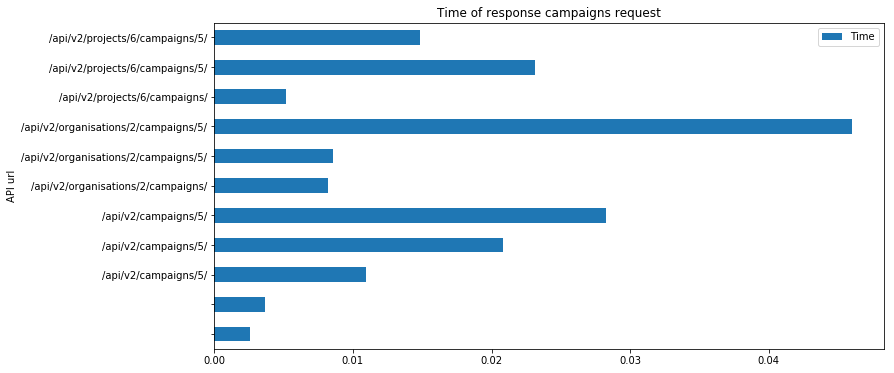

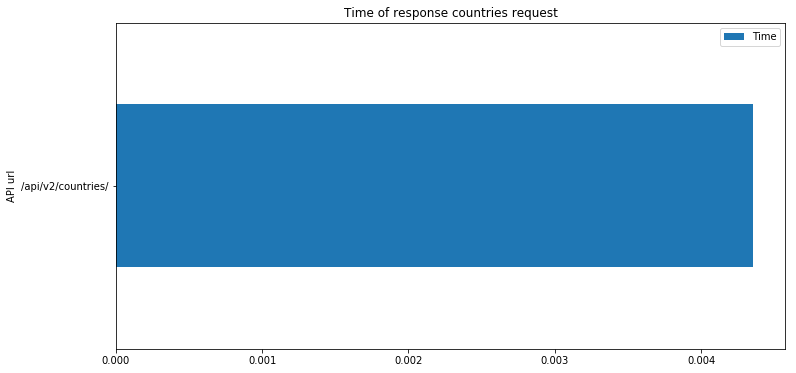

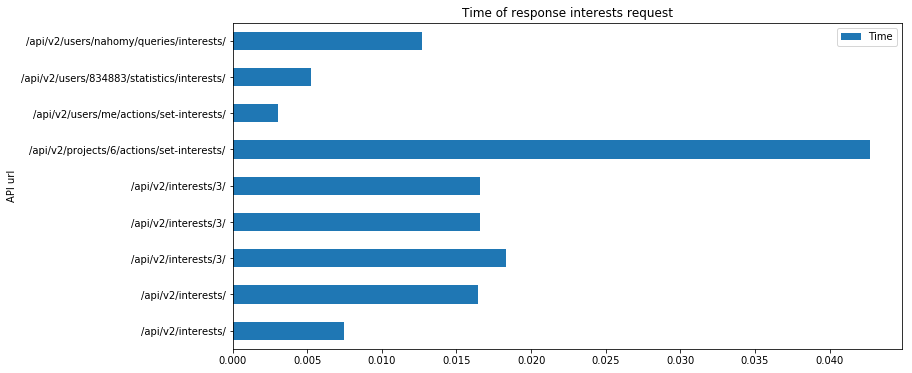

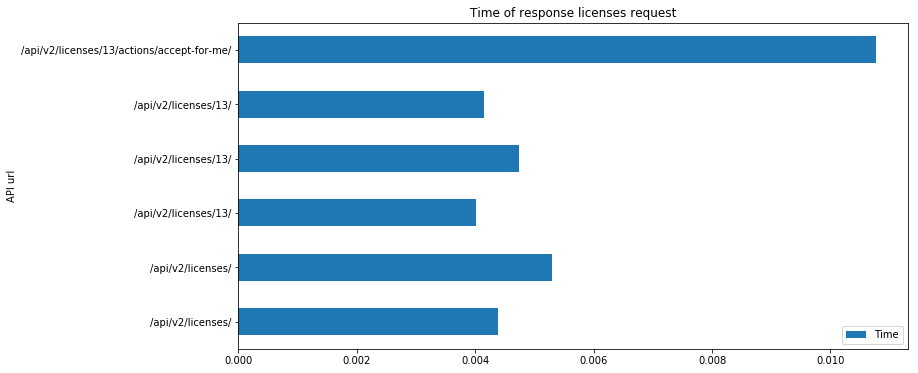

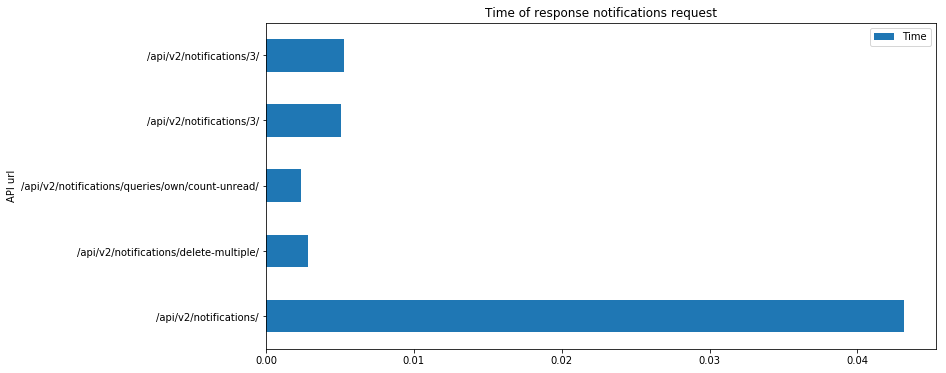

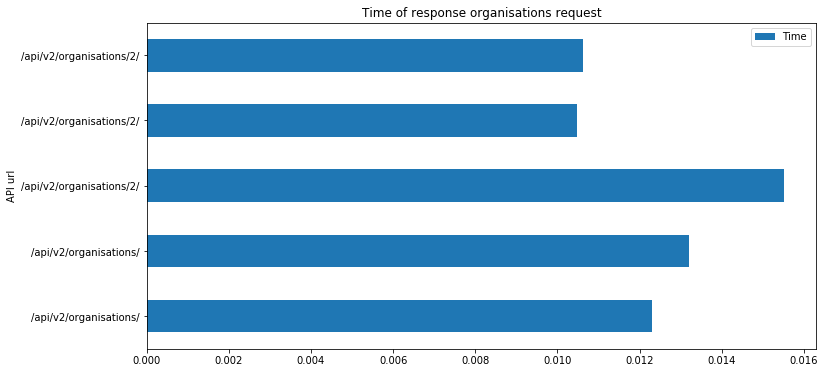

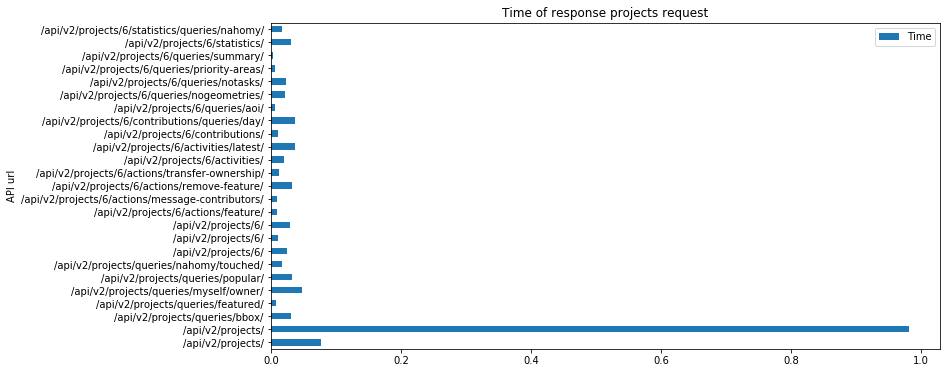

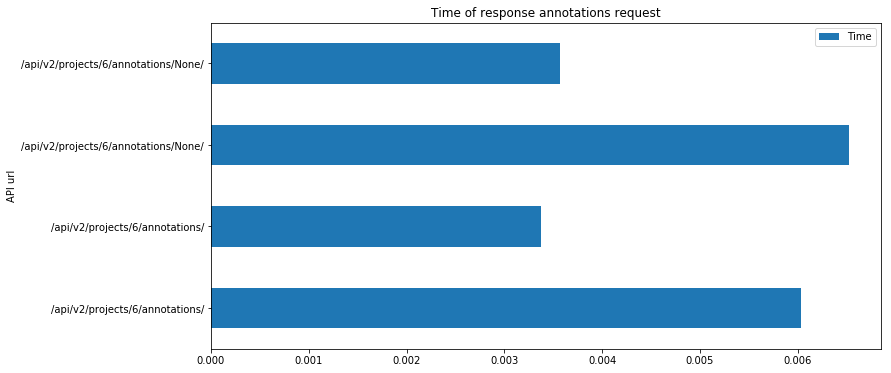

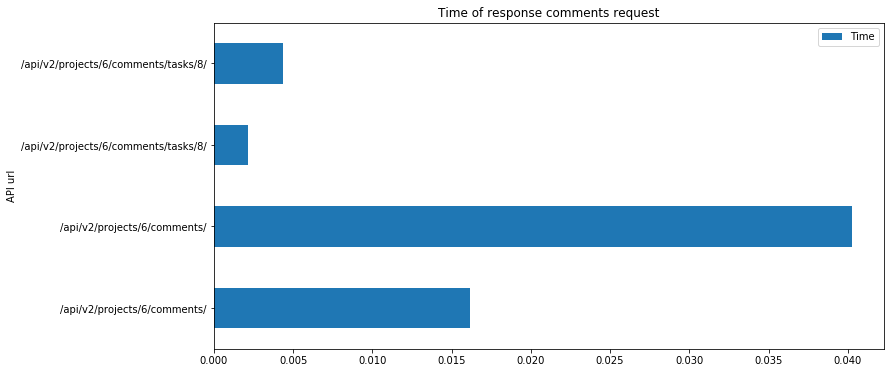

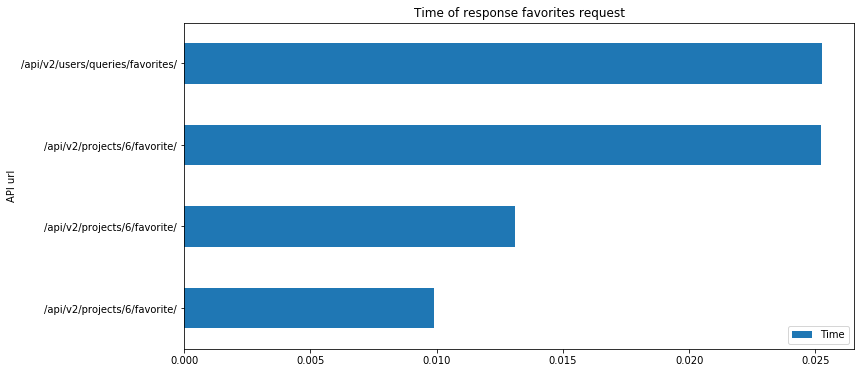

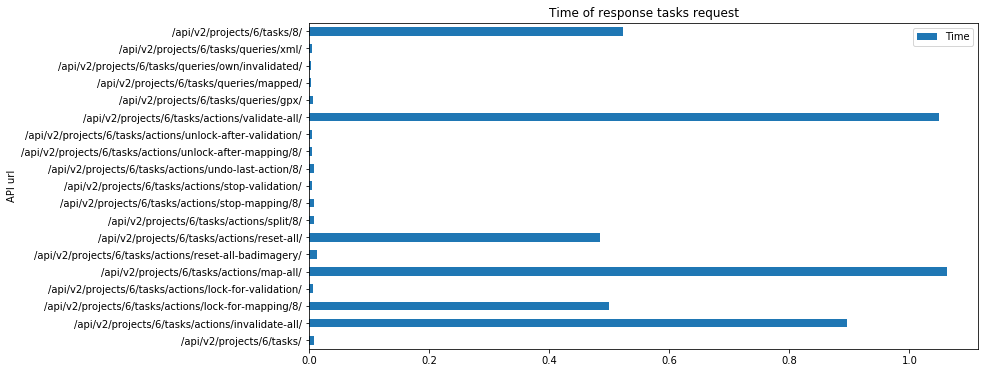

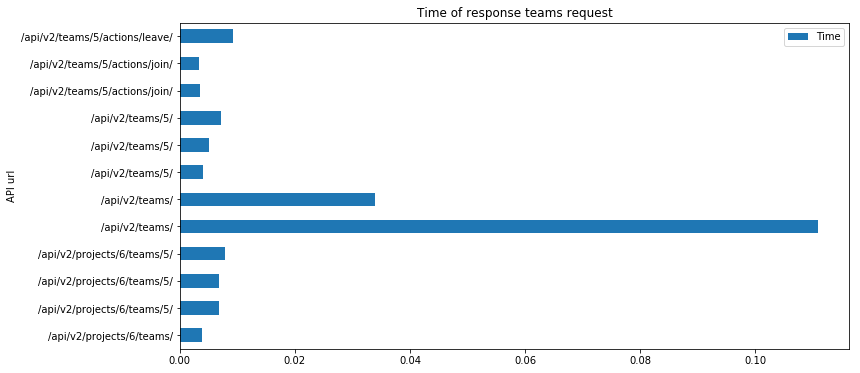

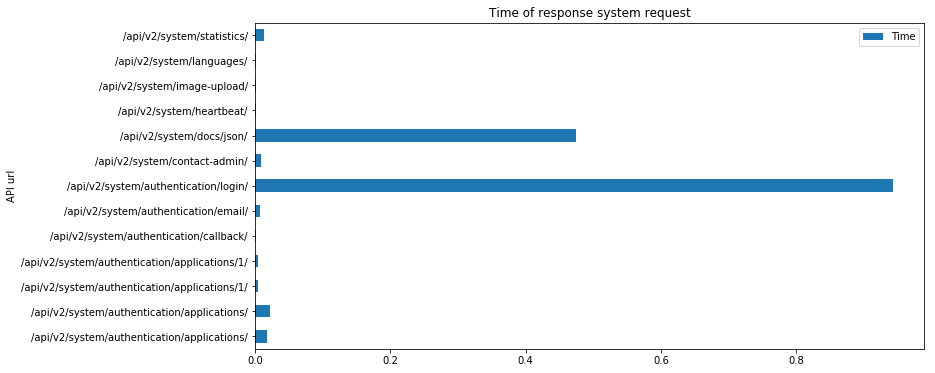

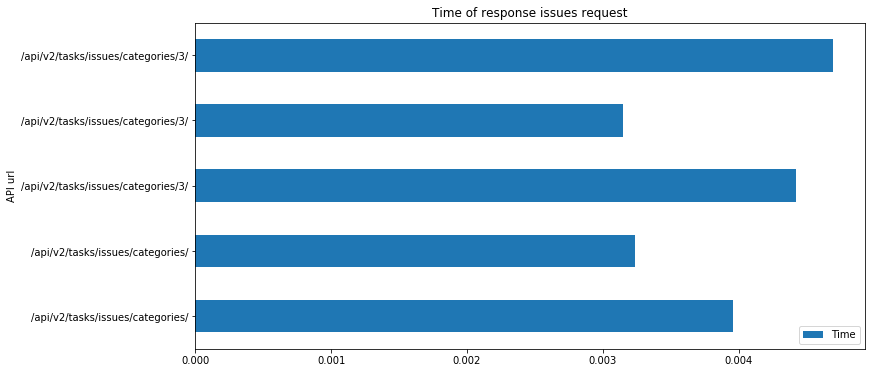

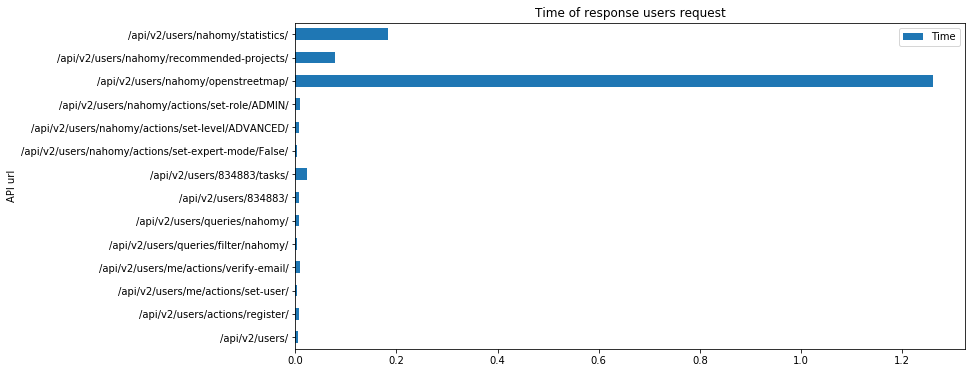

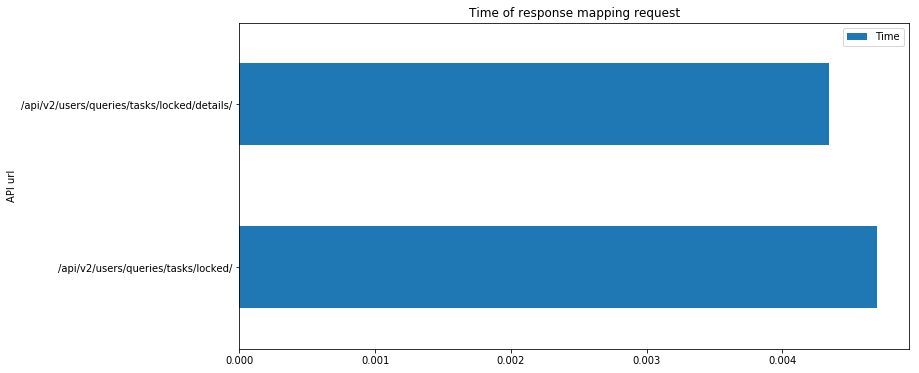

In [27]:
for model in models:
    group = grouped.get_group(model)
    group.plot(title=f'Time of response {model} request', x ='API url', y='Time',kind = 'barh',figsize=(12,6))